In [119]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [120]:
%ls ../data/

cuenta_corriente_historico.csv*  profit.csv*


# Ganancias realizadas por compra/venta de activos financieros

In [121]:
# leo el csv con pandas
df = pd.read_csv('../data/profit.csv', sep=',')

# me quedo solo con el año y el mes YYYY-MM de la columna Fecha Venta
df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df['Anio-Mes'] = df['Fecha Venta'].dt.to_period('M')
# agrupo por Anio-Mes y calculo la suma de Profit
df_grouped_ganancias_perdidas_compra_venta = df.groupby('Anio-Mes')['Ganancia/Perdida ($)'].sum().reset_index()

df_grouped_ganancias_perdidas_compra_venta

,Anio-Mes,Ganancia/Perdida ($)
0,2024-06,30837.65
1,2024-08,-7697.27
2,2024-11,142881.56
3,2024-12,192692.16
4,2025-01,221333.86
5,2025-02,85555.65
6,2025-03,7577.32
7,2025-04,-263803.17
8,2025-05,-180215.81
9,2025-06,69781.32


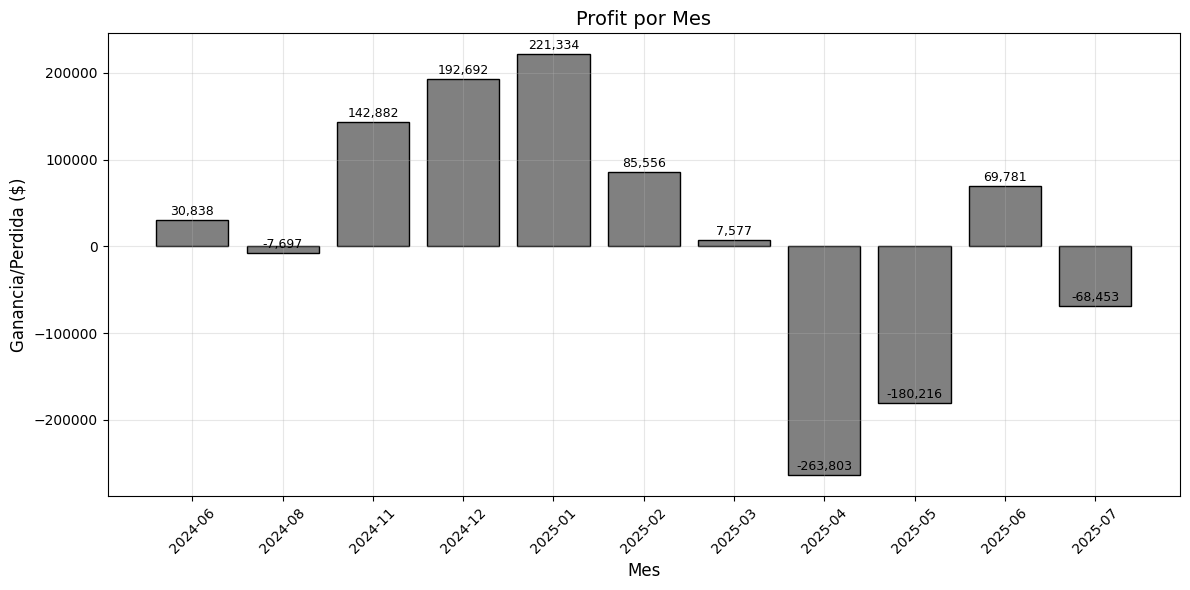

In [122]:


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot
bars = ax.bar(range(len(df_grouped_ganancias_perdidas_compra_venta)), df_grouped_ganancias_perdidas_compra_venta['Ganancia/Perdida ($)'], 
              color='gray', edgecolor='black', width=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df_grouped_ganancias_perdidas_compra_venta['Ganancia/Perdida ($)'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (max(df_grouped_ganancias_perdidas_compra_venta['Ganancia/Perdida ($)']) * 0.01),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_title('Profit por Mes', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Ganancia/Perdida ($)', fontsize=12)
ax.set_xticks(range(len(df_grouped_ganancias_perdidas_compra_venta)))
ax.set_xticklabels(df_grouped_ganancias_perdidas_compra_venta['Anio-Mes'], rotation=45, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ingresos por Dividendos o intereses

/tmp/ipykernel_3065/43551988.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos_por_dividendos['Anio-Mes'] = pd.to_datetime(df_ingresos_por_dividendos['Liquida']).dt.to_period('M')


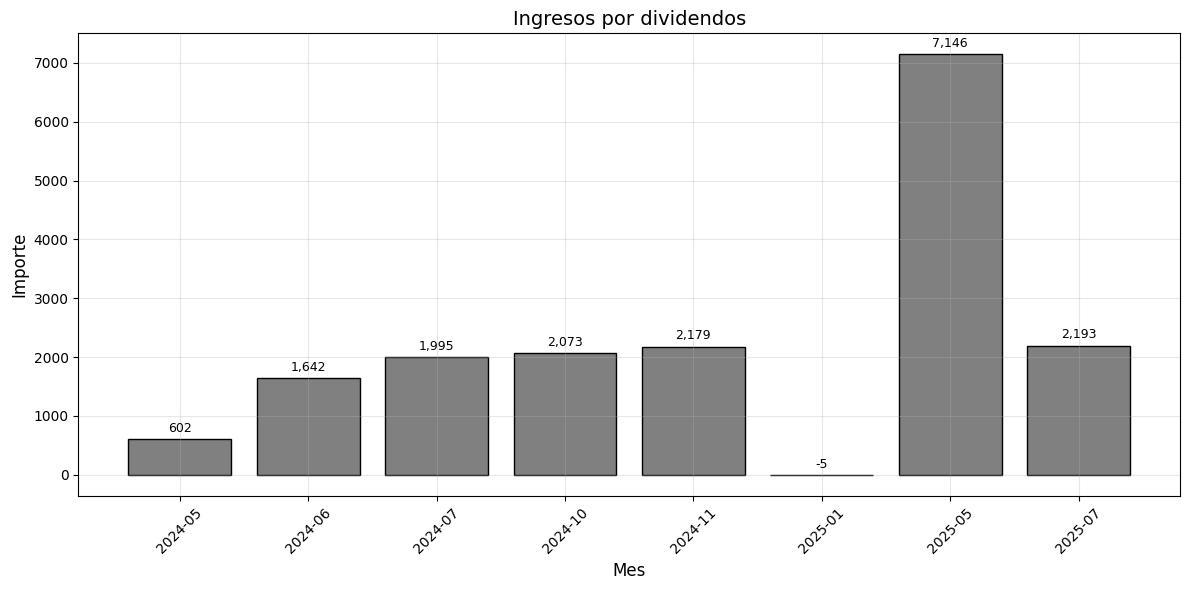

In [123]:
# leo el csv con pandas
df = pd.read_csv('../data/cuenta_corriente_historico.csv', sep=',')

# hago un distinct solo a la columna comprobante
df_comprobantes = df[['Comprobante']].drop_duplicates()

df_dividendos_e_intereses = df[df['Comprobante'].isin(['PAGO DIV', 'DIVIDENDOS', 'RETENCION', 'CREDITO DERMERC-', 'COMPRA CAUCION CONTADO', 'VENTA CAUCION TERMINO'])]

# df_comprobantes
# me quedo solo con DIVIDENDOS, CREDITO DERMERC-, RETENCION, PAGO DIV	
df_dividendos = df_dividendos_e_intereses[df_dividendos_e_intereses['Comprobante'].isin(['PAGO DIV', 'DIVIDENDOS', 'RETENCION', 'CREDITO DERMERC-'])]

# me quedo con las columnas Liquida, e Importe
df_ingresos_por_dividendos = df_dividendos[['Liquida', 'Importe']]

# a la columna Liquida le saco el día y la dejo solo con el mes y el año en formato YYYY-MM
df_ingresos_por_dividendos['Anio-Mes'] = pd.to_datetime(df_ingresos_por_dividendos['Liquida']).dt.to_period('M')

df_ingresos_por_dividendos = df_ingresos_por_dividendos[['Anio-Mes', 'Importe']]

# agrupo por mes y sumo los importes
df_ingresos_por_dividendos = df_ingresos_por_dividendos.groupby('Anio-Mes').sum().reset_index()


fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot
bars = ax.bar(range(len(df_ingresos_por_dividendos)), df_ingresos_por_dividendos['Importe'], 
              color='gray', edgecolor='black', width=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df_ingresos_por_dividendos['Importe'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (max(df_ingresos_por_dividendos['Importe']) * 0.01),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_title('Ingresos por dividendos', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Importe', fontsize=12)
ax.set_xticks(range(len(df_ingresos_por_dividendos)))
ax.set_xticklabels(df_ingresos_por_dividendos['Anio-Mes'], rotation=45, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Intereses de caución

/tmp/ipykernel_3065/1080037767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intereses_por_caucion['Anio-Mes'] = pd.to_datetime(df_intereses_por_caucion['Operado']).dt.to_period('M')


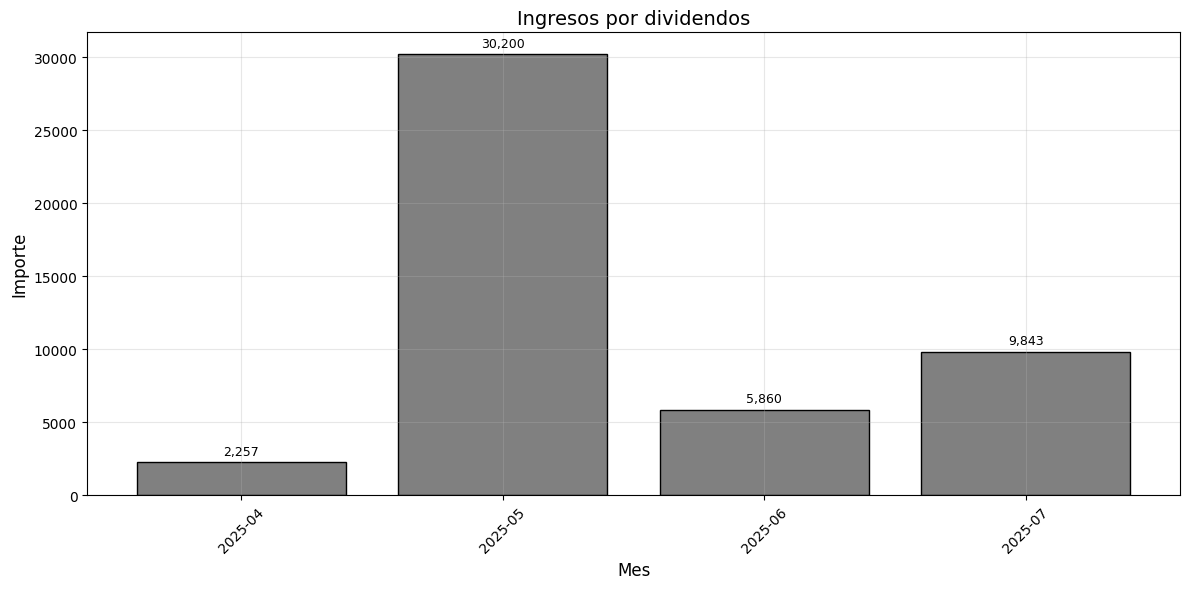

In [124]:
df_intereses_por_caucion = df[df['Comprobante'].isin(['COMPRA CAUCION CONTADO', 'VENTA CAUCION TERMINO'])]

df_intereses_por_caucion['Anio-Mes'] = pd.to_datetime(df_intereses_por_caucion['Operado']).dt.to_period('M')
df_intereses_por_caucion = df_intereses_por_caucion[['Anio-Mes', 'Importe']]
df_intereses_por_caucion = df_intereses_por_caucion.groupby('Anio-Mes').sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot
bars = ax.bar(range(len(df_intereses_por_caucion)), df_intereses_por_caucion['Importe'], 
              color='gray', edgecolor='black', width=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df_intereses_por_caucion['Importe'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (max(df_intereses_por_caucion['Importe']) * 0.01),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_title('Ingresos por dividendos', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Importe', fontsize=12)
ax.set_xticks(range(len(df_intereses_por_caucion)))
ax.set_xticklabels(df_intereses_por_caucion['Anio-Mes'], rotation=45, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Total de ganancia perdida realizadas por compra/venta de activos, dividendos e intereses.

In [125]:
# df_intereses_por_caucion
# df_ingresos_por_dividendos
# df_grouped_ganancias_perdidas_compra_venta
# renombro Ganancia/Perdida ($) por Importe
df_grouped_ganancias_perdidas_compra_venta.rename(columns={'Ganancia/Perdida ($)': 'Importe'}, inplace=True)

# hago un merge de los tres dataframes por Anio-Mes
df_total_ganancias_perdidas = df_grouped_ganancias_perdidas_compra_venta.merge(df_ingresos_por_dividendos, on='Anio-Mes', how='outer', suffixes=('_compra_venta', '_dividendos'))
df_total_ganancias_perdidas = df_total_ganancias_perdidas.merge(df_intereses_por_caucion, on='Anio-Mes', how='outer', suffixes=('', '_intereses'))  

df_total_ganancias_perdidas['Importe_sum'] = df_total_ganancias_perdidas['Importe_compra_venta'].fillna(0) + df_total_ganancias_perdidas['Importe_dividendos'].fillna(0) + df_total_ganancias_perdidas['Importe'].fillna(0)
df_total_ganancias_perdidas

,Anio-Mes,Importe_compra_venta,Importe_dividendos,Importe,Importe_sum
0,2024-05,NaN,602.33,NaN,602.33
1,2024-06,30837.65,1642.32,NaN,32479.97
2,2024-07,NaN,1994.71,NaN,1994.71
3,2024-08,-7697.27,NaN,NaN,-7697.27
4,2024-10,NaN,2072.85,NaN,2072.85
5,2024-11,142881.56,2179.15,NaN,145060.71
6,2024-12,192692.16,NaN,NaN,192692.16
7,2025-01,221333.86,-5.43,NaN,221328.43
8,2025-02,85555.65,NaN,NaN,85555.65
9,2025-03,7577.32,NaN,NaN,7577.32


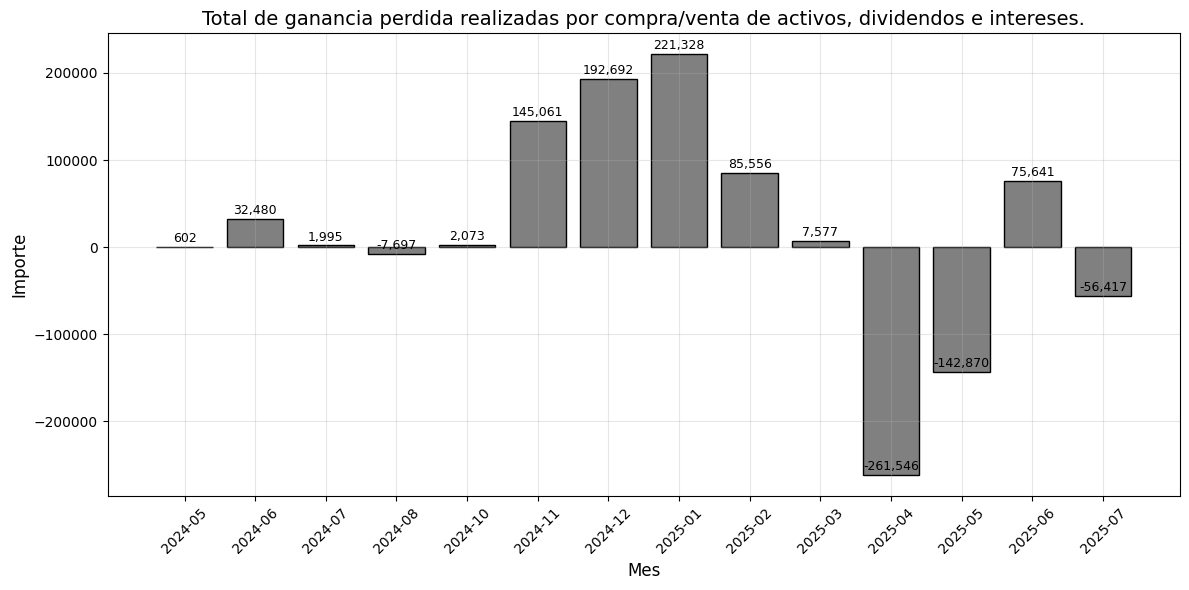

In [126]:
df_total_ganancias_perdidas_to_plot = df_total_ganancias_perdidas[['Anio-Mes', 'Importe_sum']].rename(columns={'Importe_sum': 'Importe'})

fig, ax = plt.subplots(figsize=(12, 6))

# Create bar plot
bars = ax.bar(range(len(df_total_ganancias_perdidas_to_plot)), df_total_ganancias_perdidas_to_plot['Importe'], 
              color='gray', edgecolor='black', width=0.8)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, df_total_ganancias_perdidas_to_plot['Importe'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (max(df_total_ganancias_perdidas_to_plot['Importe']) * 0.01),
            f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_title('Total de ganancia perdida realizadas por compra/venta de activos, dividendos e intereses.', fontsize=14)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Importe', fontsize=12)
ax.set_xticks(range(len(df_total_ganancias_perdidas_to_plot)))
ax.set_xticklabels(df_total_ganancias_perdidas_to_plot['Anio-Mes'], rotation=45, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [127]:
print('Promedio de ganancias/perdidas por mes:', df_total_ganancias_perdidas_to_plot['Importe'].mean())

Promedio de ganancias/perdidas por mes: 21176.84214285714
